## Observations and Insights 

In [71]:
# %matplotlib notebook

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [73]:
# take a look at both dfs to see where to merge
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [74]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [75]:
# Combine the data into a single dataset
# if you did this: (mouse_metadata, study_results, how="left", "on=["Mouse ID", "Mouse ID"])
merged_df=pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of data values.
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [77]:
# Checking the number of total mice.
tot_mice=len(merged_df.loc[:, 'Mouse ID'].unique())
tot_mice

249

In [78]:
merged_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [79]:
# # sort df by mouse ID, then use that new df to drop duplicates in timepoint column. 
# # do I need to reset the index? 
# id_df=merged_df.sort_values('Mouse ID')
# id_df

In [80]:
# # drop dupliates and return a copy-> but I want to keep the dupliates in another container
# id_df.drop_duplicates('Timepoint', inplace=False)
# id_df.count()

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# id_df.duplicated('Timepoint')
# Try this to drop duplicates - don't like this because it looks for unique values in Timepoint but doesn't sort thorugh mouse ID
# cleaned_df=id_df.drop_duplicates(subset=['Timepoint'], inplace=False)
# cleaned_df.head(20

# id_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()
# So I think that this drops only the duplicates if they have the same mouse ID AND timepoint. 
# cleaned_df=id_df.drop_duplicates(['Mouse ID', 'Timepoint'])
# cleaned_df.count()

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# ??How come groupby doesn't work on this? 
# merged_df.groupby('Mouse ID').count('Timepoint'])
# example: id_df.loc

In [83]:
# Optional: Get all the data for the duplicate mouse ID. 
# this returns a list rows where it has found a mouse id and timepoint that were duplicated. 
duplicated_id=merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']

duplicated_id
# filter_mouse.groupby(by=False)



909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
# now I can use this id to show me all the data from original dataframe with this mouse ID, and pull it
filter_1=merged_df.loc[:, 'Mouse ID']== 'g989'
dropped_data_df=merged_df.loc[filter_1, :]
dropped_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:

# # ?? this returns a list of boolean values, where false means that there is not a duplicate. 
# duplicated_id=id_df.loc[id_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# pd.DataFrame({'Mouse ID': duplicated_id})

# # filter_mouse.groupby(by=False)

# # now I can use this id to show me all the data from original dataframe with this mouse ID using .loc, and pull it

In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID., also resets index of DF
# use .loc to create a new df pulling all the dolumns where mouse ide does not equal the mouse id above 
# cleaned_df=cleaned_df.reset_index(drop=True)



In [87]:
# create a clean dataframe by only including from the original mice whose id does not equal g989
# try this on both merged_df and id_df (sorted by mouse id)
filter_2=merged_df.loc[:, 'Mouse ID']!='g989'
merged_df_clean=merged_df.loc[filter_2, :]
merged_df_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [88]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# # Same as above, but this id_df has been sorted by Mouse ID prior to using.
# # Probably best to do without sorting values prior, to keep as close as possible to original data?
# filter_3=id_df.loc[:, 'Mouse ID']!='g989'
# id_df_clean=id_df.loc[filter_2, :]
# id_df_clean.head()

In [90]:
# Checking the number of mice in the clean DataFrame. ->need to count unique vaules in mouse ID
# len(cleaned_df.loc[:, 'Mouse ID'].unique())

tot_mice_clean=merged_df_clean.loc[:, 'Mouse ID'].nunique()
tot_mice_clean

248

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_df_clean.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [92]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# you can acess a specific column of .groupby object by: cleaned_df.groupby('Drug Regimen')['Tumor Volume']
drug_df=merged_df_clean.groupby('Drug Regimen')
drug_df.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [93]:
type(drug_df)


pandas.core.groupby.generic.DataFrameGroupBy

In [94]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# think aboutwhat would be different: drug_df.mean()['Tumor Volume'] -> does the mean on all columns, then pulls value from this column only 
tv_mean=drug_df['Tumor Volume (mm3)'].mean()
tv_median=drug_df['Tumor Volume (mm3)'].median()
tv_var=drug_df['Tumor Volume (mm3)'].var()
tv_std=drug_df['Tumor Volume (mm3)'].std()
tv_sem=drug_df['Tumor Volume (mm3)'].sem()

# these all return series. I can use the series in a new df

In [95]:
# Assemble the resulting series into a single summary dataframe.
new_columns={
    "Mean Tumor Volume": tv_mean,
    "Median Tumor Volume": tv_median,
    "Variance": tv_var,
    "Standard Deviation": tv_std,
    "Standard Error of Mean": tv_sem
}

drug_summary_df=pd.DataFrame(new_columns)

In [96]:
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
type(drug_summary_df)

pandas.core.frame.DataFrame

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df=merged_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

print(type(merged_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])))
# also tried: drug_df.agg, but it didn't like that for a groupby object

agg_summary_df

<class 'pandas.core.frame.DataFrame'>


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
new_columns={
    "mean":"Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "Standard Error of Mean"
}

# Rename columns
agg_summary_df.rename(columns=new_columns)

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [100]:
# this is a series, drug_df is a groupby object
type(drug_df.count()['Mouse ID'])
drug_count=drug_df.count()['Mouse ID']
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [101]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# use drug_df (groupby object), but .count makes it a df, and only acess one of the columns is fine. 
# drug_df.count()

# drug_df.count().plot(kind='bar')

# it's better not to do this, but to access only one of the columns initially because it's less
# work for the computer

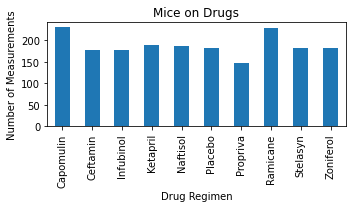

In [102]:
# ax = 
drug_count.plot(kind='bar', figsize=(5, 3), ylabel='Number of Measurements', title='Mice on Drugs')
plt.tight_layout()

# below was tyring versions of labelling axes and title with pd.plot 
# -> based on documentation, I put in the .plot phrase
    # x_label='Drug Regimen'
    # y_label='Number of Measurements'

    # ax.set_xlabel(x_label)
    # ax.set_ylabel(y_label)

In [103]:
# drug_df.count().plot(y='Mouse ID',kind='bar', figsize=(5, 3))
# # .plot.bar(x='label', y='label')

In [104]:
# is this all pyplot and not pandas? ->
# # set a title for the chart
# plt.title('Mice Take Drugs')
# plt.xlabel('Drug Regimen')
# plt.ylabel('Number of Measurements')
# plt.show()
# plt.tight_layout()

In [105]:
# I did this earlier as a work around, but in cell above was able to do the same thing using .plot's arguments in one step
# drug_count_df=drug_df.count()
# drug_count_df=pd.DataFrame(drug_count_df.loc[:, 'Mouse ID'])
# drug_count_df.plot(kind='bar')

In [106]:
# drug_df['Mouse ID'].plt()

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# set x axis
# number of ticks is the range that is composed of a list the length of unique values of drug regimen
# -> how many unique drug regimens are there? 10. Need a range of 10.

x_axis=np.arange(len(merged_df_clean.loc[:, "Drug Regimen"].unique()))

y_axis=drug_count

# # set tick locations
tick_locations = [value for value in x_axis]

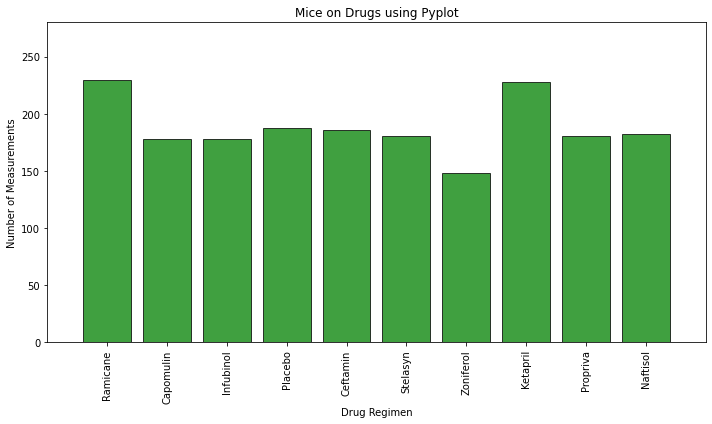

In [108]:
# # create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='g', edgecolor='k', alpha=0.75, align='center')
plt.xticks(tick_locations, merged_df_clean['Drug Regimen'].unique(), rotation='vertical')

# set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(drug_count)+50)

# set title, labels
plt.title('Mice on Drugs using Pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.tight_layout()
plt.show()

In [109]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


# pull 2 columns from orginal df and groupby sex, then .count to get count of male/female mice
# assign to variable
sex_count_df=merged_df_clean[['Mouse ID', 'Sex']].groupby('Sex').count()
sex_count_df

,Mouse ID
Sex,
Female,922
Male,958


In [111]:
new_columns={
    "Mouse ID":"Number of Mice"
}

sex_count_df_renamed=sex_count_df.rename(columns=new_columns)

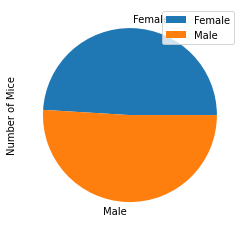

In [112]:
# create pie chart using df above
sex_count_df_renamed.plot(y='Number of Mice', x='Sex', kind='pie')
plt.show()

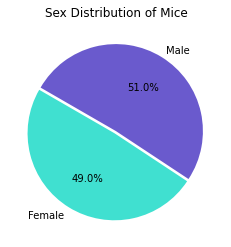

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# labels for each section of pie chart
labels = sex_count_df_renamed.index

# values of each section
sizes = sex_count_df_renamed['Number of Mice']

# colors
colors = ['turquoise', 'slateblue']

# explode
explode = [0.03, 0]


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=150)
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [114]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [115]:
# pull a reference df that you will later use for merging
mouse_drug_df=merged_df_clean.loc[:, ['Mouse ID', 'Drug Regimen']].drop_duplicates()
mouse_drug_df

,Mouse ID,Drug Regimen
0,k403,Ramicane
10,s185,Capomulin
20,x401,Capomulin
30,m601,Capomulin
40,g791,Ramicane
...,...,...
1858,z314,Stelasyn
1860,z435,Propriva
1863,z581,Infubinol
1873,z795,Naftisol


In [116]:
# pull relevant columns and groupby mouse id, find max values to find max timepoint

mouse_last_measure_df=merged_df_clean.loc[:, ['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()
mouse_last_measure_df

# merge df with max timepoint with original df (interested columns only), merge on mouse id
mouse_last_measure_df_vol=pd.merge(mouse_last_measure_df, merged_df_clean[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']], left_index=True, right_on='Mouse ID')


# create a filter to only show the rows where timepoint y = final timepoint, and fill in tumor volume
filter_df=mouse_last_measure_df_vol['Timepoint_x']==mouse_last_measure_df_vol['Timepoint_y']
mouse_last_measure_df_with_volume=mouse_last_measure_df_vol[filter_df][['Mouse ID', 'Timepoint_y', 'Tumor Volume (mm3)']]
mouse_final_tumor_df=pd.merge(mouse_last_measure_df_with_volume, mouse_drug_df)

In [117]:
mouse_final_tumor_df

,Mouse ID,Timepoint_y,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [118]:
# I want to find the rows where drug Regimen == the drug name, and then take the tumor volume column.
capomulin_volume=mouse_final_tumor_df.loc[mouse_final_tumor_df.loc[:, 'Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)']
ramicane_volume=mouse_final_tumor_df.loc[mouse_final_tumor_df.loc[:, 'Drug Regimen']== 'Ramicane']['Tumor Volume (mm3)']
infubinol_volume=mouse_final_tumor_df.loc[mouse_final_tumor_df.loc[:, 'Drug Regimen']== 'Infubinol']['Tumor Volume (mm3)']
ceftamin_volume=mouse_final_tumor_df.loc[mouse_final_tumor_df.loc[:, 'Drug Regimen']== 'Ceftamin']['Tumor Volume (mm3)']


In [119]:
capomulin_quartiles = capomulin_volume.quantile([.25, .5, .75])
cap_lower_q = capomulin_quartiles[0.25]
cap_upper_q = capomulin_quartiles[0.75]
cap_iqr = cap_upper_q - cap_lower_q

# print(f"The lower quartile of cap is: {cap_lower_q}")
# print(f"The upper quartile of cap is: {cap_upper_q}")
# print(f"The interquartile range of cap is: {cap_iqr}")
# print(f"The the median of cap is: {capomulin_quartiles[0.5]} ")

cap_lower_bound = cap_lower_q - (1.5*cap_iqr)
cap_upper_bound = cap_upper_q + (1.5*cap_iqr)

# print(f'Values below {cap_lower_bound} could be outliers')
# print(f'Values above {cap_upper_bound} could be outliers')

print(f'Capomulin potential outliers: {capomulin_volume.loc[(capomulin_volume<cap_lower_bound)|(capomulin_volume>cap_upper_bound)]}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [120]:
# create a filter where drug regimen = capomulin, final tumor is less than lower and greater than upper
# cap_filter=mouse_final_tumor_df.loc[:, 'Drug Regimen']=='Capomulin'
# cap_outlier_filter_1=mouse_final_tumor_df.loc[:, 'Tumor Volume (mm3)']<cap_lower_bound
# cap_outlier_filter_2=mouse_final_tumor_df.loc[:, 'Tumor Volume (mm3)']>cap_upper_bound 
# mouse_final_tumor_df.loc[[cap_filter&(cap_outlier_filter_1|cap_outlier_filter_2)]



In [121]:
ramicane_quartiles = ramicane_volume.quantile([.25, .5, .75])
ram_lower_q = ramicane_quartiles[0.25]
ram_upper_q = ramicane_quartiles[0.75]
ram_iqr = ram_upper_q - ram_lower_q

# print(f"The lower quartile of ram is: {ram_lower_q}")
# print(f"The upper quartile of ram is: {ram_upper_q}")
# print(f"The interquartile range of ram is: {ram_iqr}")
# print(f"The the median of ran is: {ramicane_quartiles[0.5]} ")

ram_lower_bound = ram_lower_q - (1.5*ram_iqr)
ram_upper_bound = ram_upper_q + (1.5*ram_iqr)

# print(f'Values below {ram_lower_bound} could be outliers')
# print(f'Values above {ram_upper_bound} could be outliers')

print(f'Ramicane potential outliers: {ramicane_volume.loc[(ramicane_volume<ram_lower_bound)|(ramicane_volume>ram_upper_bound)]}')

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [122]:
infubinol_quartiles = infubinol_volume.quantile([.25, .5, .75])
inf_lower_q = infubinol_quartiles[0.25]
inf_upper_q = infubinol_quartiles[0.75]
inf_iqr = inf_upper_q - inf_lower_q

# print(f"The lower quartile of inf is: {inf_lower_q}")
# print(f"The upper quartile of inf is: {inf_upper_q}")
# print(f"The interquartile range of inf is: {inf_iqr}")
# print(f"The the median of inf is: {infubinol_quartiles[0.5]} ")

inf_lower_bound = inf_lower_q - (1.5*inf_iqr)
inf_upper_bound = inf_upper_q + (1.5*inf_iqr)

# print(f'Values below {inf_lower_bound} could be outliers')
# print(f'Values above {inf_upper_bound} could be outliers')

print(f'Infubinol potential outliers: {infubinol_volume.loc[(infubinol_volume<inf_lower_bound)|(infubinol_volume>inf_upper_bound)]}')

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [123]:
ceftamin_quartiles = ceftamin_volume.quantile([.25, .5, .75])
cef_lower_q = ceftamin_quartiles[0.25]
cef_upper_q = ceftamin_quartiles[0.75]
cef_iqr = cef_upper_q - cef_lower_q

# print(f"The lower quartile of cef is: {cef_lower_q}")
# print(f"The upper quartile of cef is: {cef_upper_q}")
# print(f"The interquartile range of cef is: {cef_iqr}")
# print(f"The the median of cef is: {ceftamin_quartiles[0.5]} ")

cef_lower_bound = cef_lower_q - (1.5*cef_iqr)
cef_upper_bound = cef_upper_q + (1.5*cef_iqr)

# print(f'Values below {cef_lower_bound} could be outliers')
# print(f'Values above {cef_upper_bound} could be outliers')

print(f'Ceftamin potential outliers: {ceftamin_volume.loc[(ceftamin_volume<cef_lower_bound)|(ceftamin_volume>cef_upper_bound)]}')

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
# treatment_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# # Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_data= []


# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#     # Locate the rows which contain mice on each drug and get the tumor volumes



#     # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [125]:
treatment_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tick_locations = [1, 2, 3, 4]

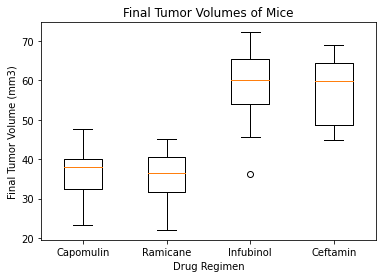

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes of Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot([capomulin_volume, ramicane_volume, infubinol_volume, ceftamin_volume])
plt.xticks(tick_locations, labels=treatment_list)
plt.show()

In [127]:
# used the below filter to check if I was pulling the correct values ->change == value to see info on different mouse
# id_filter=merged_df_clean['Mouse ID']=='a457'
# merged_df_clean.loc[id_filter, :]

## Line and Scatter Plots

In [128]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# using original df, pull time and tumor volume for one mouse id that also is capomulin
merged_df_clean.head()
capomulin_filter=merged_df_clean.loc[:, 'Drug Regimen']=='Capomulin'

cap_mice=merged_df_clean.loc[capomulin_filter, 'Mouse ID']
cap_mice.head(10)

# mouse s185 is on capomulin.
# pull time and tumor volume for 

cap_mouse_filter=merged_df_clean.loc[:, 'Mouse ID']=='s185'
cap_mouse_df=merged_df_clean.loc[cap_mouse_filter,]
cap_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


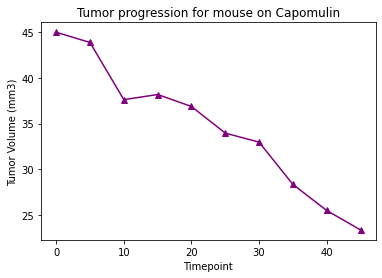

In [129]:
# generate line plot of tumor volume vs time point for mouse s185
# y axis = tumor volume
cap_mouse_tumor_volume=cap_mouse_df['Tumor Volume (mm3)']
# x axis = timepoint
cap_timepoint=cap_mouse_df['Timepoint']

plt.plot(cap_timepoint, cap_mouse_tumor_volume, marker='^', color='purple')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Tumor progression for mouse on Capomulin')
plt.show()

In [130]:
capomulin_filter_1=merged_df_clean.loc[:, 'Drug Regimen']=='Capomulin'
capomulin_df=merged_df_clean.loc[capomulin_filter_1, :]

average_tumor_volume=capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight=capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

In [131]:
type(average_tumor_volume)

pandas.core.series.Series

In [132]:
mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

The correlation between both factors is 0.84


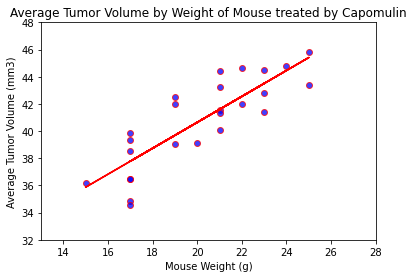

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


plt.scatter(x=mouse_weight, y=average_tumor_volume, marker='o', facecolors='blue', edgecolors='red', alpha=0.75)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight of Mouse treated by Capomulin')
plt.xlim(13, 28)
plt.ylim(32, 48)

# Calculate linear regression model
x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = sts.pearsonr(x_values, y_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen